In [6]:
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt

In [7]:

dev = qml.device("default.qubit", wires=2)

In [8]:
# пример запутанного состояния
@qml.qnode(dev)
def circuit(param):
    qml.RX(param, wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

In [ ]:
# максимально запутанное состояние
# (если система запутана, то да максимальная запутанность)
# измерение в среднем (мат ожидание) даёт 0
# те состояние |0> и |1> равновероятны 
print(circuit(np.pi / 2))

(np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16))


In [27]:
print(circuit( np.pi/ 4))

(np.float64(0.7071067811865475), np.float64(0.7071067811865475))


In [28]:
print(circuit( 0))

(np.float64(1.0), np.float64(1.0))


In [15]:
list(map(circuit,[0,np.pi]))

[(np.float64(1.0), np.float64(1.0)), (np.float64(-1.0), np.float64(-1.0))]

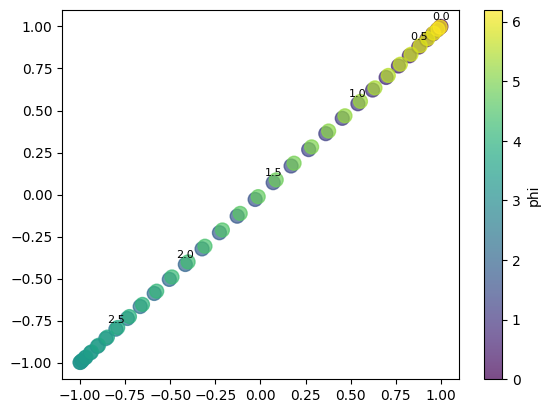

In [ ]:
# наблюдаем корреляцию измерений - запутанное состояние
phi = np.arange(0,2*np.pi,step=0.1)
x,y = zip(*list(map(circuit,phi)))
plt.scatter(x,y,c=phi,cmap='viridis', s=100, alpha=0.7)

for i, label in enumerate(phi[:30:5]):
    plt.annotate(
        label,                      # Текст подписи
        (x[i*5], y[i*5]),           # Координаты точки
        textcoords="offset points", # Способ позиционирования текста (смещение от точки)
        xytext=(0, 5),              # Смещение текста по x и y (5 пунктов вверх)
        ha='center',                # Горизонтальное выравнивание по центру точки
        fontsize=8                  # Размер шрифта
    )

plt.colorbar(label='phi')
plt.show()

In [ ]:
# x = y
np.allclose(x,y)

True

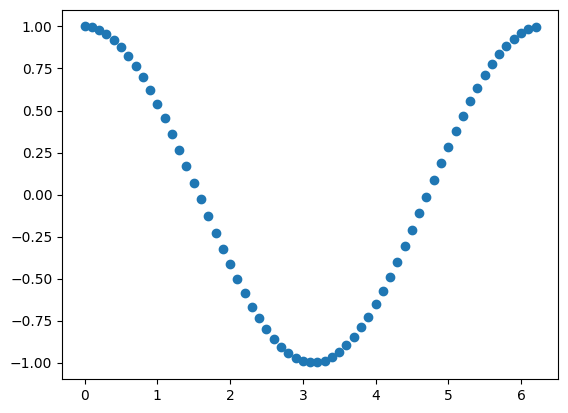

In [41]:
plt.scatter(phi,x)
plt.show()